# DataFrame

In [2]:
import pandas as pd
a = {'name': ['John','Cena','Randy'], 'age': [36,35,46]}
#print(f"my name is {a['name']} and my age is {a['age']}")
print(a.keys(),a.values(),a.items(),a.get("name"),sep=" | ")

df = pd.DataFrame(a)
print(df)

dict_keys(['name', 'age']) | dict_values([['John', 'Cena', 'Randy'], [36, 35, 46]]) | dict_items([('name', ['John', 'Cena', 'Randy']), ('age', [36, 35, 46])]) | ['John', 'Cena', 'Randy']
    name  age
0   John   36
1   Cena   35
2  Randy   46


# Series and Index

In [37]:
import pandas as pd
a = {'name': ['John','Cena','Randy'], 'age': [36,35,46]}

#sr = pd.Series(a.get("age"),index=a.get("name"))
#sr = pd.Series([i**2 for i in range(1,6)],index=range(1,6),name='Age')
sr = pd.Series([i**2 for i in range(1,6)],index=pd.period_range('2025-03-25',periods=5,freq='D'),name='Age')
#sr = pd.Series([i**2 for i in range(1,6)],name='Age')
print(sr)

2025-03-25     1
2025-03-26     4
2025-03-27     9
2025-03-28    16
2025-03-29    25
Freq: D, Name: Age, dtype: int64


# Filter data

In [7]:
import pandas as pd
a = {'name': ['John','Cena','Randy'], 'age': [36,35,46]}

df = pd.DataFrame(a)
print(df[df['age'] < 40])

   name  age
0  John   36
1  Cena   35


# Missing data

In [44]:
a = {'name': ['John',None,'Randy'], 'age': [36,35,None]}

df = pd.DataFrame(a)
df_new = df.fillna({'name': 'Unknown', 'age': df['age'].mean()}, inplace=False)

print(df)
print(df_new)

    name   age
0   John  36.0
1   None  35.0
2  Randy   NaN
      name   age
0     John  36.0
1  Unknown  35.0
2    Randy  35.5


# Merging and Joining DataFrames

In [66]:
import pandas as pd

team1 = pd.DataFrame({'ID':[1,2,3],'name': ['John','Rey','Randy'], 'age': [36,35,30]})
team2 = pd.DataFrame({'ID':[1,2,4],'name': ['Eddie','Batista','Punk'], 'age': [36,35,32]})

#df = pd.merge(team1,team2,on='ID',how='left')
#df = pd.merge(team1,team2,on='ID',how='right')
#df = pd.merge(team1,team2,on='ID',how='outer
df = pd.merge(team1,team2,on='ID',how='inner')
print(df)
print(df[['ID','name_x','age_x']].fillna('NA'))
df_rename = df.rename(columns={'name_x':'name','age_x':'age'})
print(df_rename[['ID','name','age']])

   ID name_x  age_x   name_y  age_y
0   1   John     36    Eddie     36
1   2    Rey     35  Batista     35
   ID name_x  age_x
0   1   John     36
1   2    Rey     35
   ID  name  age
0   1  John   36
1   2   Rey   35


# Grouping and Aggregate

In [61]:
import pandas as pd
team1 = pd.DataFrame({'ID':[1,2,3],'Dept':['A','B','B'],'name': ['John','Rey','Randy'], 'age': [36,35,30]})
print(team1)

grouped_df = team1.groupby('Dept')['age'].mean()
print(grouped_df)
grouped_df.describe()

   ID Dept   name  age
0   1    A   John   36
1   2    B    Rey   35
2   3    B  Randy   30
Dept
A    36.0
B    32.5
Name: age, dtype: float64


,age
count,2.000000
mean,34.250000
std,2.474874
min,32.500000
25%,33.375000
50%,34.250000
75%,35.125000
max,36.000000


# I/O

In [76]:
import pandas as pd
read_csv = pd.read_csv('/content/sample_data/california_housing_train.csv')
print(read_csv)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -114.31     34.19                15.0       5612.0          1283.0   
1        -114.47     34.40                19.0       7650.0          1901.0   
2        -114.56     33.69                17.0        720.0           174.0   
3        -114.57     33.64                14.0       1501.0           337.0   
4        -114.57     33.57                20.0       1454.0           326.0   
...          ...       ...                 ...          ...             ...   
16995    -124.26     40.58                52.0       2217.0           394.0   
16996    -124.27     40.69                36.0       2349.0           528.0   
16997    -124.30     41.84                17.0       2677.0           531.0   
16998    -124.30     41.80                19.0       2672.0           552.0   
16999    -124.35     40.54                52.0       1820.0           300.0   

       population  households  median_income  media

# Data visualization

<Axes: >

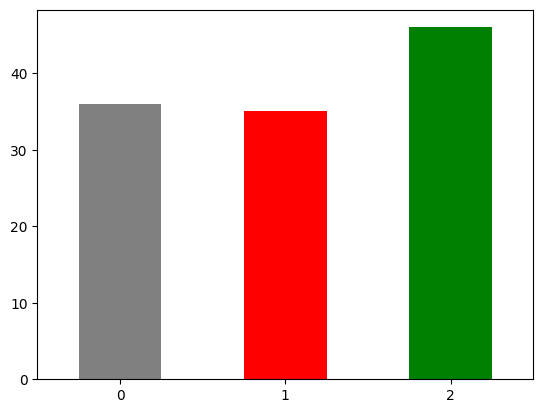

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

a = {'name': ['John','Cena','Randy'], 'age': [36,35,46]}

#df = pd.DataFrame(a)
#colors = ['green' if name == 'John' else 'blue' for name in df['name']]

df = pd.DataFrame(a)
#colors = ['green' if name == 'John' else 'blue' for name in df['name']]
colors = ['red' if age == df['age'].min() else 'green' if age == df['age'].max() else 'grey' for age in df['age']]
#df.plot.bar(x='name',y='age',rot=0,color=colors,fontsize=12)
#plt.legend(df['name'])
#plt.show()
#df.plot.barh(x='name',y='age',rot=0,color='blue',fontsize=12)
#df.plot.pie(y='age',labels=df['name'],autopct='%1.0f%%')
df['age'].plot(kind='bar',rot=0,color=colors)
#help(df.plot.bar)



# Time series

In [60]:
import pandas as pd
#period = 12
period = 365
daterange = pd.date_range('2025-01-01',periods=period,freq='D')
#daterange = pd.date_range('2025-01-01',periods=period,freq='MS')
print(daterange)
series = pd.Series(range(1,period+1),index=daterange)
print(series)

DatetimeIndex(['2025-01-01', '2025-01-02', '2025-01-03', '2025-01-04',
               '2025-01-05', '2025-01-06', '2025-01-07', '2025-01-08',
               '2025-01-09', '2025-01-10',
               ...
               '2025-12-22', '2025-12-23', '2025-12-24', '2025-12-25',
               '2025-12-26', '2025-12-27', '2025-12-28', '2025-12-29',
               '2025-12-30', '2025-12-31'],
              dtype='datetime64[ns]', length=365, freq='D')
2025-01-01      1
2025-01-02      2
2025-01-03      3
2025-01-04      4
2025-01-05      5
             ... 
2025-12-27    361
2025-12-28    362
2025-12-29    363
2025-12-30    364
2025-12-31    365
Freq: D, Length: 365, dtype: int64


,0
count,365.000000
mean,183.000000
std,105.510663
min,1.000000
25%,92.000000
50%,183.000000
75%,274.000000
max,365.000000


# Loading and exploring datasets

In [68]:
import pandas as pd
read_csv = pd.read_csv('/content/sample_data/california_housing_train.csv')
#print(read_csv)
#read_csv.head(10)
read_csv.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


(array([2., 0., 3., 1., 1., 3., 1., 1., 3., 2., 5., 0., 4., 1., 1., 4., 0.,
        3., 1., 4., 1., 2., 1., 2., 4., 2., 1., 2., 1., 1., 2., 1., 3., 1.,
        4., 2., 0., 3., 4., 3., 3., 3., 2., 2., 2., 2., 2., 2., 1., 1.]),
 array([ 0.  ,  1.94,  3.88,  5.82,  7.76,  9.7 , 11.64, 13.58, 15.52,
        17.46, 19.4 , 21.34, 23.28, 25.22, 27.16, 29.1 , 31.04, 32.98,
        34.92, 36.86, 38.8 , 40.74, 42.68, 44.62, 46.56, 48.5 , 50.44,
        52.38, 54.32, 56.26, 58.2 , 60.14, 62.08, 64.02, 65.96, 67.9 ,
        69.84, 71.78, 73.72, 75.66, 77.6 , 79.54, 81.48, 83.42, 85.36,
        87.3 , 89.24, 91.18, 93.12, 95.06, 97.  ]),
 <BarContainer object of 50 artists>)

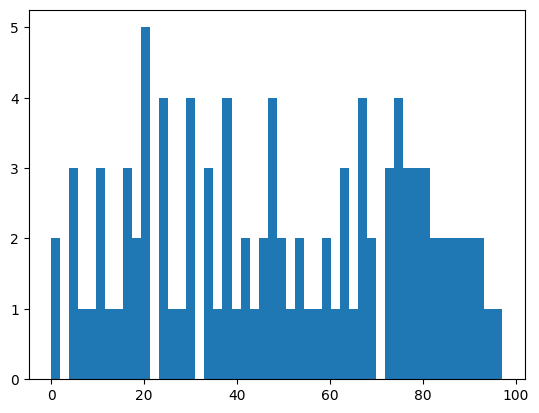

In [3]:
import matplotlib.pyplot as plt
import numpy as np
a = {'age': np.random.randint(0,100,100)}
df = pd.DataFrame(a)
#print(a)
#print(df)
#print(df['age'])
plt.hist(df['age'],bins=50)
#plt.show()

# Indexing and Filtering data

In [15]:
# Retrieve rows
a = {'name': ['John','Cena','Randy'], 'age': [36,35,46]}
df = pd.DataFrame(a)

first_row = df.iloc[2:3]
All_row_first_column = df.iloc[:,1]
print(first_row)
print(All_row_first_column)
#df.iloc[0]

    name  age
2  Randy   46
0    36
1    35
2    46
Name: age, dtype: int64


In [16]:
# Retreive columns

a = {'name': ['John','Cena','Randy'], 'age': [36,35,46]}
df = pd.DataFrame(a)

first_column = df['name']
multiple_columns = df[['name','age']]
print(first_column)
print(multiple_columns)
#df.iloc[0]

0     John
1     Cena
2    Randy
Name: name, dtype: object
    name  age
0   John   36
1   Cena   35
2  Randy   46


In [18]:
#filtering

a = {'name': ['John','Cena','Randy'], 'age': [36,35,46]}
df = pd.DataFrame(a)
#print(df)
#df.iloc[:3]
df = df.query('name == "John" and age > 35')
#df.query('name in ["John","Cena"] and age >= 35')
#df.filter(like='John')
#print(df[df['name'].str.contains('John')])
print(df)

   name  age
0  John   36


# Data cleaning and preprocessing

In [35]:
import pandas as pd
data = {
 'OrderID': [1, 2, None, 4, 5],
 'Product': ['A', 'B', 'C', 'A', 'D'],
 'Quantity': [10, 20, -5, 15, 30],
 'Price': [25.0, None, 20.0, 30.0, 40.0],
}

print(data)
df = pd.DataFrame(data)
print(df)
df_drop = df.dropna(inplace=False)
print(df_drop)
df_fill = df.fillna(0,inplace=False)
print(df_fill)
df_fill_cus = df.fillna({'OrderID': 'Unknown', 'Price': df['Price'].mean()},inplace=False)
print(df_fill_cus)


{'OrderID': [1, 2, None, 4, 5], 'Product': ['A', 'B', 'C', 'A', 'D'], 'Quantity': [10, 20, -5, 15, 30], 'Price': [25.0, None, 20.0, 30.0, 40.0]}
   OrderID Product  Quantity  Price
0      1.0       A        10   25.0
1      2.0       B        20    NaN
2      NaN       C        -5   20.0
3      4.0       A        15   30.0
4      5.0       D        30   40.0
   OrderID Product  Quantity  Price
0      1.0       A        10   25.0
3      4.0       A        15   30.0
4      5.0       D        30   40.0
   OrderID Product  Quantity  Price
0      1.0       A        10   25.0
1      2.0       B        20    0.0
2      0.0       C        -5   20.0
3      4.0       A        15   30.0
4      5.0       D        30   40.0
   OrderID Product  Quantity  Price
0      1.0       A        10  25.00
1      2.0       B        20  28.75
2  Unknown       C        -5  20.00
3      4.0       A        15  30.00
4      5.0       D        30  40.00


In [52]:
#Transformations

import pandas as pd
data = {
 'OrderID': [1, 2, None, 4, 5],
 'Product': ['A', 'B', 'C', 'A', 'D'],
 'Quantity': [10, 20, -5, 15, 30],
 'Price': [25.0, None, 20.0, 30.0, 40.0],
}

#print(data)
df = pd.DataFrame(data)
print(df)
df_fill = df.fillna(0)
#print(df_fill)
df_fill['OrderID'] = df_fill['OrderID'].astype(int)
print(df_fill)


   OrderID Product  Quantity  Price
0      1.0       A        10   25.0
1      2.0       B        20    NaN
2      NaN       C        -5   20.0
3      4.0       A        15   30.0
4      5.0       D        30   40.0
   OrderID Product  Quantity  Price
0        1       A        10   25.0
1        2       B        20    0.0
2        0       C        -5   20.0
3        4       A        15   30.0
4        5       D        30   40.0


In [59]:
#populate dummy data

import pandas as pd
data = {
 'OrderID': [1, 2, None, 4, 5],
 'Product': ['A', 'B', 'C', 'A', 'D'],
 'Quantity': [10, 20, -5, 15, 30],
 'Price': [25.0, None, 20.0, 30.0, 40.0],
}

df = pd.DataFrame(data)
df = pd.get_dummies(df,columns=['Product'],dtype=float)
print(df)

   OrderID  Quantity  Price  Product_A  Product_B  Product_C  Product_D
0      1.0        10   25.0        1.0        0.0        0.0        0.0
1      2.0        20    NaN        0.0        1.0        0.0        0.0
2      NaN        -5   20.0        0.0        0.0        1.0        0.0
3      4.0        15   30.0        1.0        0.0        0.0        0.0
4      5.0        30   40.0        0.0        0.0        0.0        1.0


# Handling Outliers

In [63]:
# Identifying /Handling outliers using Z score

import pandas as pd
data = {
 'OrderID': [1, 2, None, 4, 5],
 'Product': ['A', 'B', 'C', 'A', 'D'],
 'Quantity': [10, 20, -5, 15, 30],
 'Price': [25.0, None, 20.0, 30.0, 40.0],
}

import numpy as np

df = pd.DataFrame(data)
df = df.fillna(0)
z_scores = np.abs((df['Price'] - df['Price'].mean()) / df['Price'].std())
df_filtered = df[z_scores < 3]
print(df_filtered)
print(z_scores)

   OrderID Product  Quantity  Price
0      1.0       A        10   25.0
1      2.0       B        20    0.0
2      0.0       C        -5   20.0
3      4.0       A        15   30.0
4      5.0       D        30   40.0
0    0.13484
1    1.55066
2    0.20226
3    0.47194
4    1.14614
Name: Price, dtype: float64


# Handling duplicates

In [76]:
import pandas as pd
data = {
 'OrderID': [1, 2, 2, 4, 5],
 'Product': ['A', 'B', 'C', 'A', 'D'],
 'Quantity': [10, 20, 20, 15, 30],
 'Price': [25.0, 20.0, 20.0, 30.0, 40.0],
}

df = pd.DataFrame(data)
print(df)
df = df.drop_duplicates(subset=['OrderID'],inplace=False,)
#df = df.drop_duplicates()
print(df)

   OrderID Product  Quantity  Price
0        1       A        10   25.0
1        2       B        20   20.0
2        2       C        20   20.0
3        4       A        15   30.0
4        5       D        30   40.0
   OrderID Product  Quantity  Price
0        1       A        10   25.0
1        2       B        20   20.0
3        4       A        15   30.0
4        5       D        30   40.0


In [28]:
import pandas as pd

# Sample DataFrame
data = {
    "ID": [101, 102, 103, 104, 101, 105, 106, 102, 107],
    "Name": ["Alice", "Bob", "Charlie", "David", "Alice", "Eve", "Frank", "Bob", "Grace"],
    "Score": [90, 85, 88, 92, 90, 75, 89, 85, 80]
}
df = pd.DataFrame(data)

#duplicates_df = df[df.duplicated(keep=False)]  # 'keep=False' keeps all occurrences of duplicates
duplicates_df = df[df.duplicated()]

# Display the duplicate DataFrame
print(duplicates_df)

    ID   Name  Score
4  101  Alice     90
7  102    Bob     85


# Histogram Data visualization

(array([2., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([35. , 36.1, 37.2, 38.3, 39.4, 40.5, 41.6, 42.7, 43.8, 44.9, 46. ]),
 <BarContainer object of 10 artists>)

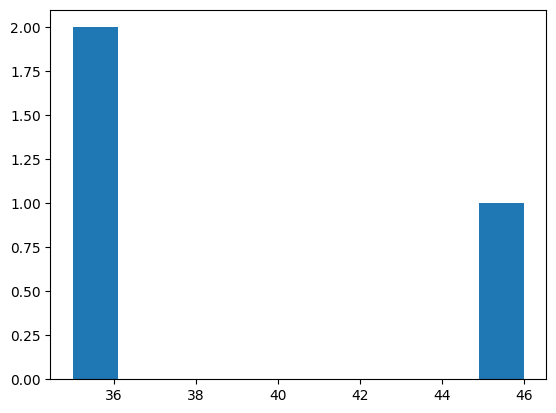

In [79]:
import matplotlib.pyplot as plt

a = {'name': ['John','Cena','Randy'], 'age': [36,35,46]}
df = pd.DataFrame(a)

plt.hist(df['age'],bins=10)



# Data splitting using ML

In [105]:
from sklearn.model_selection import train_test_split
import pandas as pd
data = {
 'OrderID': [1, 2, 2, 4, 5, 6],
 'Price': [25.0, 20.0, 20.0, 30.0, 40.0, 50.0],
}

df = pd.DataFrame(data)
print(df)
x = df.drop('Price',axis=1)
y = df['Price']
#z = df.drop(labels=[0],axis=0)
#print(x)
#print(y)
##print(z)

train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.5, random_state=42)
print(train_x)
print(test_x)
print(train_y)
print(test_y )

   OrderID  Price
0        1   25.0
1        2   20.0
2        2   20.0
3        4   30.0
4        5   40.0
5        6   50.0
   OrderID
2        2
4        5
3        4
   OrderID
0        1
1        2
5        6
2    20.0
4    40.0
3    30.0
Name: Price, dtype: float64
0    25.0
1    20.0
5    50.0
Name: Price, dtype: float64


# Aggregation and Grouping

In [13]:
import pandas as pd
data = {
 'OrderID': [1, 2, 4, 1, 5],
 'Product': ['A', 'B', 'C', 'A', 'D'],
 'Quantity': [10, 20, 20, 15, 30],
 'Price': [25.0, 20.0, 20.0, 30.0, 40.0],
}

df = pd.DataFrame(data)
print(df)

grouped_df = df.groupby('Product')['Quantity'].sum()
print(grouped_df)

grouped_df = df.groupby('Product')['Quantity'].agg(['sum','mean','median'])
print(grouped_df)

grouped_df = df.groupby(['Product','OrderID'])['Quantity'].agg(['sum','mean','median'])
print(grouped_df)

   OrderID Product  Quantity  Price
0        1       A        10   25.0
1        2       B        20   20.0
2        4       C        20   20.0
3        1       A        15   30.0
4        5       D        30   40.0
Product
A    25
B    20
C    20
D    30
Name: Quantity, dtype: int64
         sum  mean  median
Product                   
A         25  12.5    12.5
B         20  20.0    20.0
C         20  20.0    20.0
D         30  30.0    30.0
                 sum  mean  median
Product OrderID                   
A       1         25  12.5    12.5
B       2         20  20.0    20.0
C       4         20  20.0    20.0
D       5         30  30.0    30.0


In [17]:
import pandas as pd
def custom_funct(values):
  return values.max() - values.min()

import pandas as pd
data = {
 'OrderID': [1, 2, 4, 1, 5],
 'Product': ['A', 'B', 'C', 'A', 'D'],
 'Quantity': [10, 20, 20, 15, 30],
 'Price': [25.0, 20.0, 20.0, 30.0, 40.0],
}


df = pd.DataFrame(data)
ser = pd.Series([1,2,3,4,5,6])
print(ser.agg(custom_funct))
print(df)

grouped_df = df.groupby('Product')['Quantity'].agg(custom_funct)
print(grouped_df)

5
   OrderID Product  Quantity  Price
0        1       A        10   25.0
1        2       B        20   20.0
2        4       C        20   20.0
3        1       A        15   30.0
4        5       D        30   40.0
Product
A    5
B    0
C    0
D    0
Name: Quantity, dtype: int64


# Pivot


In [21]:
import pandas as pd
data = {
 'OrderID': [1, 2, 3, 4, 5],
 'Product': ['A', 'B', 'C', 'A', 'D'],
 'Quantity': [10, 20, 20, 15, 30],
 'Price': [25.0, 20.0, 20.0, 30.0, 40.0],
}

df = pd.DataFrame(data)
print(df)

pivot_df = df.pivot_table(index='OrderID',columns='Product',values='Quantity',aggfunc='sum')
print(pivot_df.fillna(0))

   OrderID Product  Quantity  Price
0        1       A        10   25.0
1        2       B        20   20.0
2        3       C        20   20.0
3        4       A        15   30.0
4        5       D        30   40.0
Product     A     B     C     D
OrderID                        
1        10.0   0.0   0.0   0.0
2         0.0  20.0   0.0   0.0
3         0.0   0.0  20.0   0.0
4        15.0   0.0   0.0   0.0
5         0.0   0.0   0.0  30.0


# Transformation

In [25]:
import pandas as pd
data = {
 'OrderID': [1, 2, 4, 1, 5],
 'Product': ['A', 'B', 'C', 'A', 'D'],
 'Quantity': [10, 20, 20, 15, 30],
 'Price': [25.0, 20.0, 20.0, 30.0, 40.0],
}

df = pd.DataFrame(data)
print(df)

grouped_df = df.groupby('Product')['Quantity'].transform('sum')
grouped_df_new = df.groupby('Product')['Quantity'].agg('sum')
print(grouped_df)
print(grouped_df_new)

   OrderID Product  Quantity  Price
0        1       A        10   25.0
1        2       B        20   20.0
2        4       C        20   20.0
3        1       A        15   30.0
4        5       D        30   40.0
0    25
1    20
2    20
3    25
4    30
Name: Quantity, dtype: int64
Product
A    25
B    20
C    20
D    30
Name: Quantity, dtype: int64


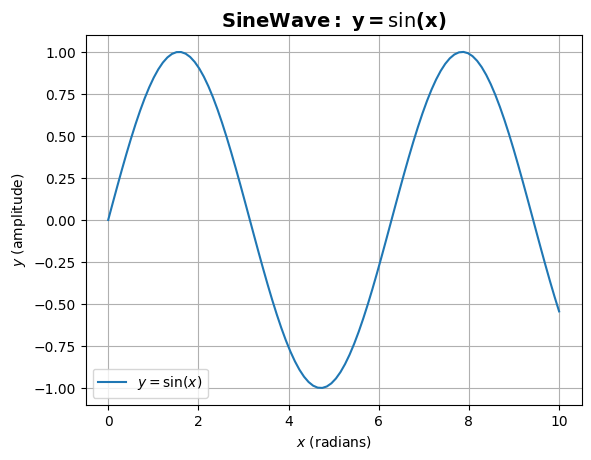

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Data
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Plot with LaTeX labels
plt.plot(x, y, label=r"$y = \sin(x)$")
plt.title(r"$\bf{Sine Wave:} \ y = \sin(x)$", fontsize=14)
plt.xlabel(r"$x$ (radians)")
plt.ylabel(r"$y$ (amplitude)")
plt.legend()
plt.grid()

# Show the plot
plt.show()

# Data visualization

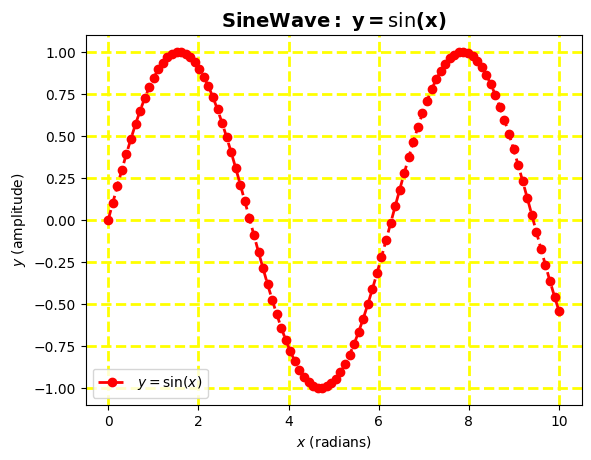

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 100)
y = np.sin(x)
#print(x)
#print(y)

# Plot with LaTeX labels
plt.plot(x, y, label=r"$y = \sin(x)$", color='red', linestyle='--', linewidth =2, marker='o')
plt.xlabel(r"$x$ (radians)")
plt.ylabel(r"$y$ (amplitude)")
plt.legend()
plt.grid(color='yellow', linestyle='--', linewidth=2)
plt.title(r"$\bf{Sine Wave:} \ y = \sin(x)$", fontsize=14)

# Show the plot
plt.show()
#

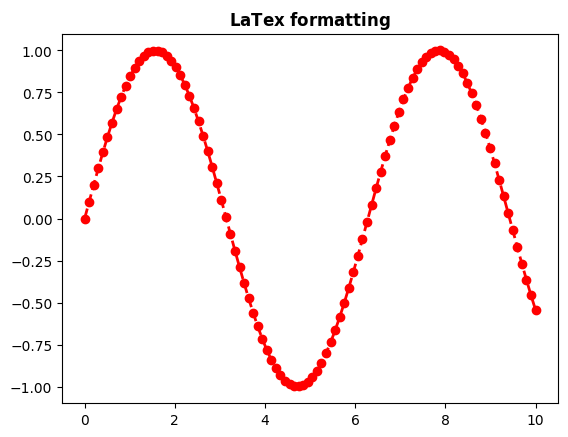

In [16]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 100)
y = np.sin(x)
title = r"$\bf{LaTex}\ formatting$"
plt.plot(x, y,label=title, color='red', linestyle='--', linewidth =2, marker='o')
plt.title(title)
plt.show()

           x         y
0    0.00000  0.000000
1    0.10101  0.101355
2    0.20202  0.204814
3    0.30303  0.312660
4    0.40404  0.427564
..       ...       ...
95   9.59596  0.172874
96   9.69697  0.279119
97   9.79798  0.391551
98   9.89899  0.513276
99  10.00000  0.648361

[100 rows x 2 columns]


Text(0.5, 1.0, '$\\bf{Tan Wave:} \\ y = \\tan(x)$')

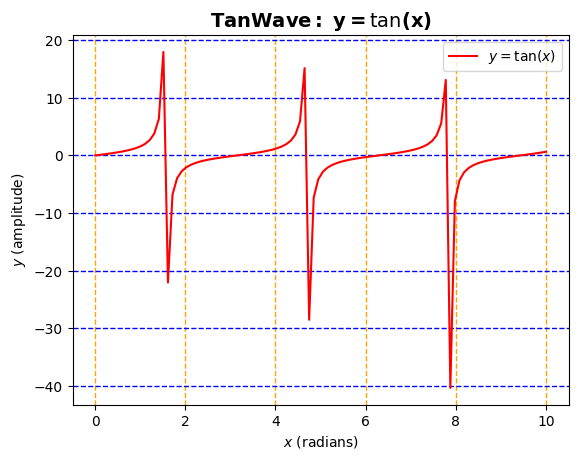

In [46]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 100)
y = np.tan(x)
#print(x)
#rint(y)

a = {'x': x, 'y': y}
df = pd.DataFrame(a)
print(df)

# Plot with LaTeX labels
plt.plot(x, y, label=r"$y = \tan(x)$", color='red' , linestyle='-', linewidth=1.5)
plt.xlabel(r"$x$ (radians)")
plt.ylabel(r"$y$ (amplitude)")
plt.legend()
plt.grid(axis='x',color='orange', linestyle='--', linewidth=1)
plt.grid(axis='y',color='blue', linestyle='--', linewidth=1)
plt.title(r"$\bf{Tan Wave:} \ y = \tan(x)$", fontsize=14)

# Show the plot
#plt.show()
#

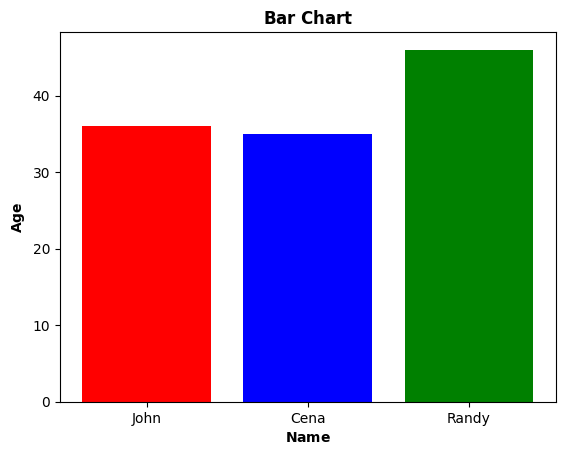

In [21]:
#Bar chart

import matplotlib.pyplot as plt
import pandas as pd

a= {'name': ['John','Cena','Randy'], 'age': [36,35,46]}
df = pd.DataFrame(a)

plt.bar(df['name'],df['age'],color=['red','blue','green'])
plt.xlabel(r"$\bf{Name}$")
plt.ylabel(r"$\bf{Age}$")
plt.title(r"$\bf{Bar\ Chart}$")
plt.show()



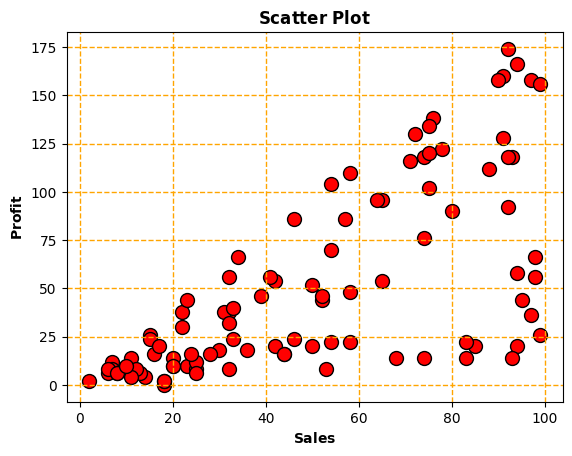

In [60]:
#scatterplot

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#sales = np.linspace(0,10,10)
#profit = np.linspace(0,20,10)*20

sales = np.random.randint(1,100,100)
profit = np.random.randint(sales) * 2

#print(sales)
#print(profit)

plt.scatter(sales,profit,color='red',marker='o',s=100,edgecolors='black',alpha=1) #o,s,^,+
#plt.plot(profit,color='blue',linestyle='-')
plt.xlabel(r"$\bf{Sales}$")
plt.ylabel(r"$\bf{Profit}$")
plt.title(r"$\bf{Scatter\ Plot}$")
plt.grid(color='orange', linestyle='--', linewidth=1)
plt.show()

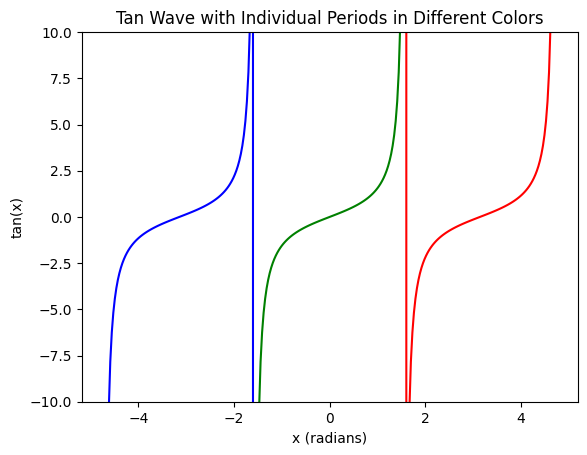

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Define the x-range and number of periods
x_start = -3 * np.pi / 2  # Starting point
x_end = 3 * np.pi / 2    # Ending point
num_periods = 3          # Number of periods to plot

# Calculate the period length
period_length = np.pi

# Generate x values for one period
x_period = np.linspace(0, period_length, 100)

# Define colors for each period (you can add more colors if needed)
colors = ['blue', 'green', 'red']

# Plot each period with a different color
for i in range(num_periods):
    x_shifted = x_period + i * period_length + x_start  # Shift x values for each period
    plt.plot(x_shifted, np.tan(x_shifted), color=colors[i % len(colors)]) # Plot with color and handle asymptotes


# Customize the plot
plt.title('Tan Wave with Individual Periods in Different Colors')
plt.xlabel('x (radians)')
plt.ylabel('tan(x)')
plt.ylim(-10, 10)  # Set y-axis limits to handle asymptotes

# Show the plot
plt.show()

           x         y
0    0.00000  0.000000
1    0.10101  0.101355
2    0.20202  0.204814
3    0.30303  0.312660
4    0.40404  0.427564
..       ...       ...
95   9.59596  0.172874
96   9.69697  0.279119
97   9.79798  0.391551
98   9.89899  0.513276
99  10.00000  0.648361

[100 rows x 2 columns]


Text(0.5, 1.0, '$\\bf{Tan Wave:} \\ y = \\tan(x)$')

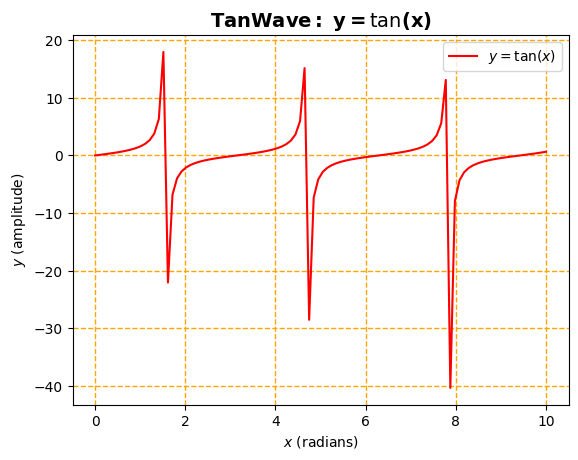

In [49]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 100)
y = np.tan(x)
#print(x)
#rint(y)

a = {'x': x, 'y': y}
df = pd.DataFrame(a)
print(df)

# Plot with LaTeX labels
plt.plot(df['x'], df['y'], label=r"$y = \tan(x)$", color='red' , linestyle='-', linewidth=1.5)
plt.xlabel(r"$x$ (radians)")
plt.ylabel(r"$y$ (amplitude)")
plt.legend()
plt.grid(color='orange', linestyle='--', linewidth=1)
plt.title(r"$\bf{Tan Wave:} \ y = \tan(x)$", fontsize=14)

# Show the plot
#plt.show()
#

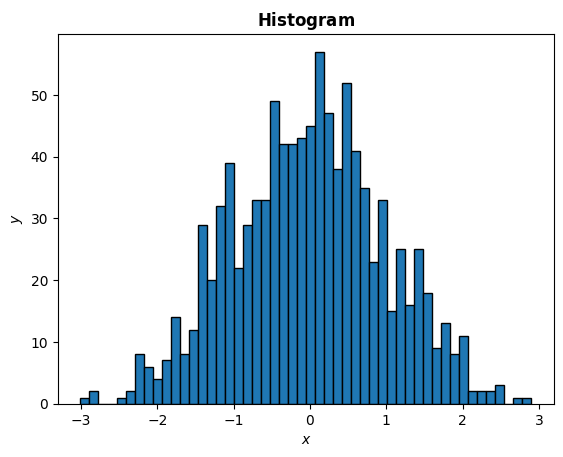

In [85]:
# histogram

import numpy as np
import matplotlib.pyplot as plt

a = np.random.randn(1000)
#print(a)

plt.hist(a,bins=50,edgecolor='black')
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.title(r"$\bf{Histogram}$")
plt.show()

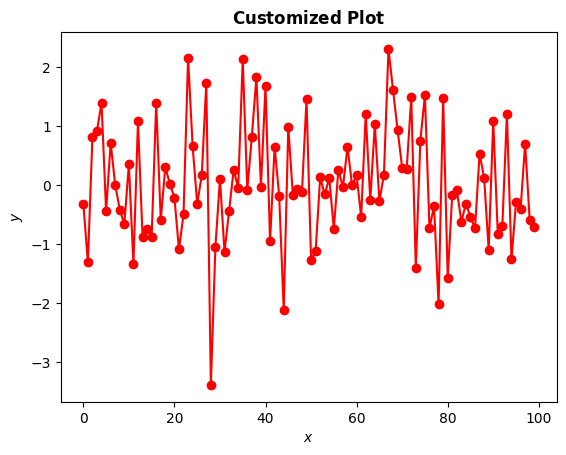

In [102]:
# line plot

import numpy as np
import matplotlib.pyplot as plt

a = np.random.randn(100)
#print(a)

plt.plot(a,marker='o',color='red',linestyle='-')
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.title(r"$\bf{Customized \ Plot}$")
plt.show()

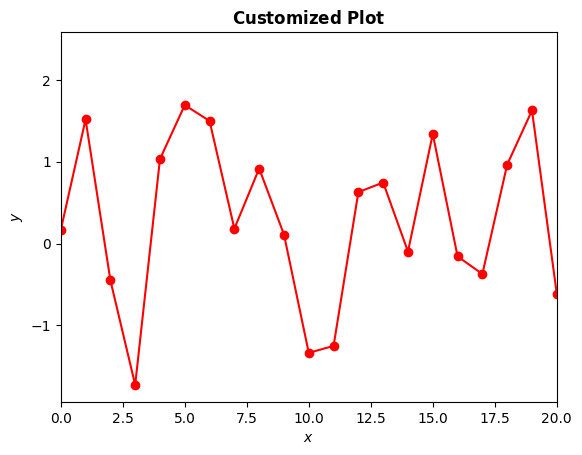

In [108]:
# line plot

import numpy as np
import matplotlib.pyplot as plt

a = np.random.randn(100)
#print(a)
b=plt.xlim(0,20)
plt.plot(a,marker='o',color='red',linestyle='-')
#plt.plot(b,marker='o',color='red',linestyle='-')
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.title(r"$\bf{Customized \ Plot}$")
plt.show()

Text(0, 0.5, '$y$')

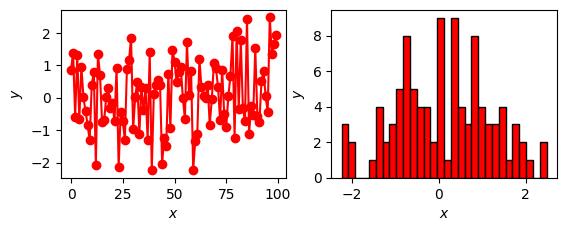

In [116]:
#subplot

# line plot

import numpy as np
import matplotlib.pyplot as plt

a = np.random.randn(100)
#print(a)

sub = plt.subplot(2,2,1)
plt.plot(a,marker='o',color='red',linestyle='-')
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")

sub = plt.subplot(2,2,2)
plt.hist(a,bins=30,color='red',edgecolor='black',linestyle='-')
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")


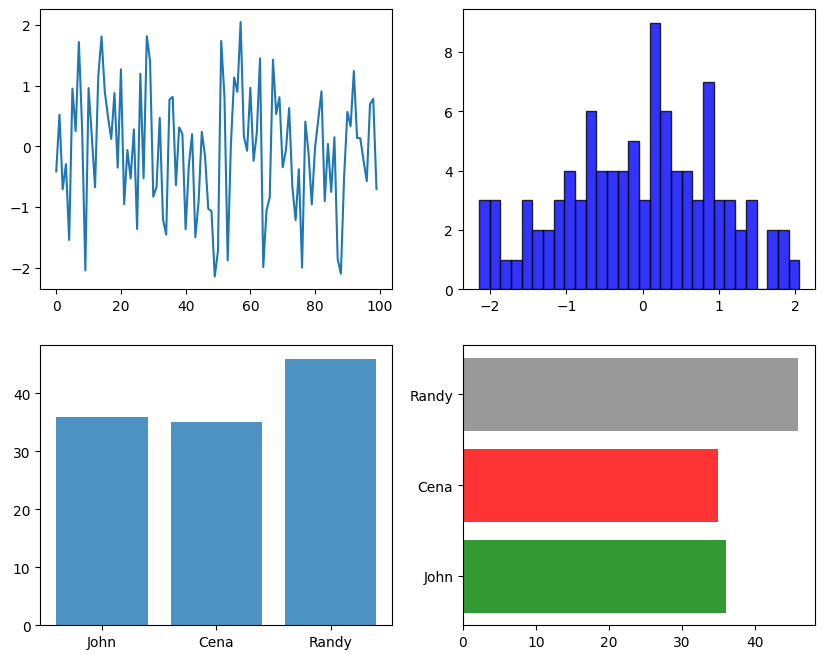

In [19]:
import numpy as np
import matplotlib.pyplot as plt

a = np.random.randn(100)
b = {'name': ['John','Cena','Randy'], 'age': [36,35,46]}
df = pd.DataFrame(b)

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0,0].plot(a)
axs[0,1].hist(a,bins=30,color='blue',edgecolor='black',linestyle='-',alpha=0.8)
axs[1,0].bar(df['name'],df['age'],alpha=0.8)
axs[1,1].barh(df['name'],df['age'],color=['green','red','grey'],alpha=0.8)

plt.show()

# Advanced Visualization Techniques

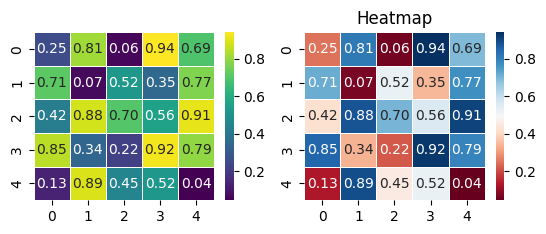

In [31]:
#Heatmap
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = np.random.rand(5,5)
#print(data)

sub = plt.subplot(2,2,1)
heatmap = sns.heatmap(data,annot=True,cmap='viridis',fmt='.2f',linewidths=0.5)

sub = plt.subplot(2,2,2)
heatmap = sns.heatmap(data,annot=True,cmap='RdBu',fmt='.2f',linewidths=0.5)

#heatmap = sns.heatmap(data,annot=True,cmap='coolwarm',fmt='.2f',linewidths=0.5)  #viridis #RdBu #coolwarm
plt.title('Heatmap')
plt.show()


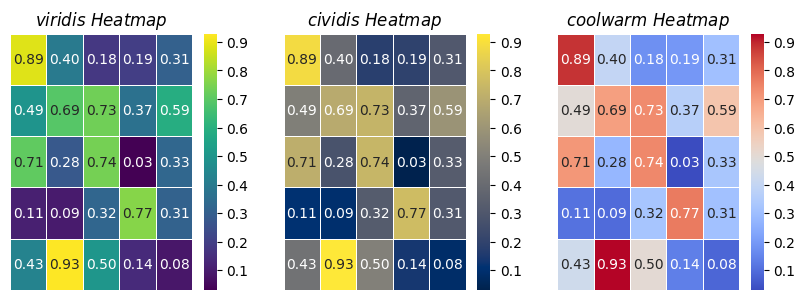

In [71]:
#Heatmap
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

data = np.random.rand(5,5)
#print(data)

fig, axs = plt.subplots(1, 3, figsize=(10, 3.33))

sns.heatmap(data,annot=True,cmap='viridis',fmt='.2f',linewidths=0.5,ax=axs[0],yticklabels=False,xticklabels=False)
sns.heatmap(data,annot=True,cmap='cividis',fmt='.2f',linewidths=0.5,ax=axs[1],yticklabels=False,xticklabels=False)
sns.heatmap(data,annot=True,cmap='coolwarm',fmt='.2f',linewidths=0.5,ax=axs[2],yticklabels=False,xticklabels=False)
axs[0].set_title(r"$\it{viridis\ Heatmap}$")
axs[1].set_title(r"$\it{cividis\ Heatmap}$")
axs[2].set_title(r"$\it{coolwarm\ Heatmap}$")
plt.show()


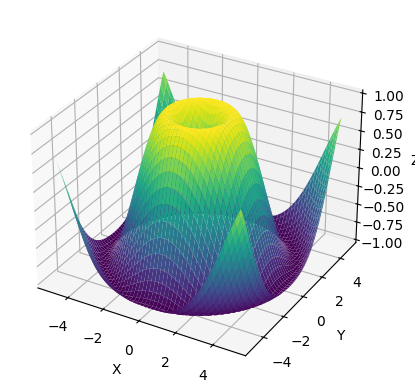

In [32]:
#3D plot

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

Z = np.sin(np.sqrt(X**2 + Y**2))

ax.plot_surface(X, Y, Z, cmap='viridis', linewidth=0.5, antialiased=True)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.savefig('3d_plot.png',dpi=300)
plt.show()

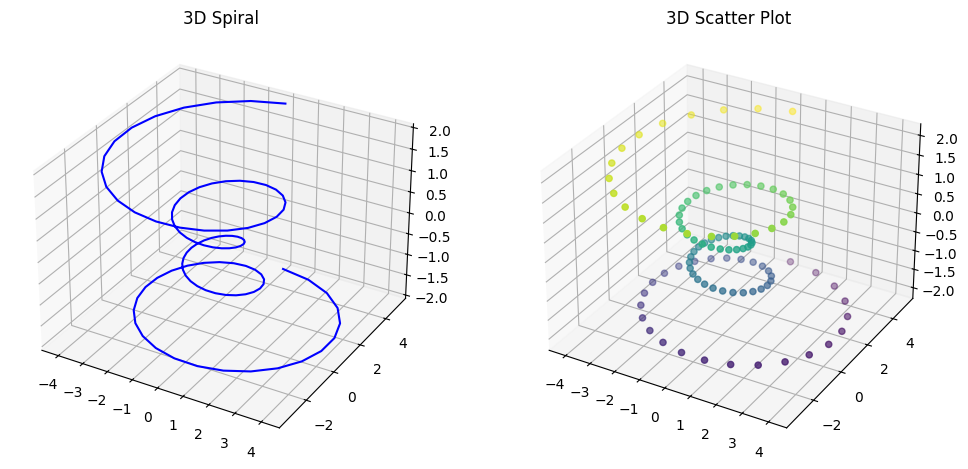

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate sample data
theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
z = np.linspace(-2, 2, 100)
r = z**2 + 1
x = r * np.sin(theta)
y = r * np.cos(theta)

# Create figure
fig = plt.figure(figsize=(12, 6))

# First 3D subplot (1st position in 1st row)
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot(x, y, z, label="Spiral Curve", color="b")
ax1.set_title("3D Spiral")

# Second 3D subplot (2nd position in 1st row)
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(x, y, z, c=z, cmap='viridis', label="Point Cloud")
ax2.set_title("3D Scatter Plot")

# Show the figure
plt.show()


#Seaborn

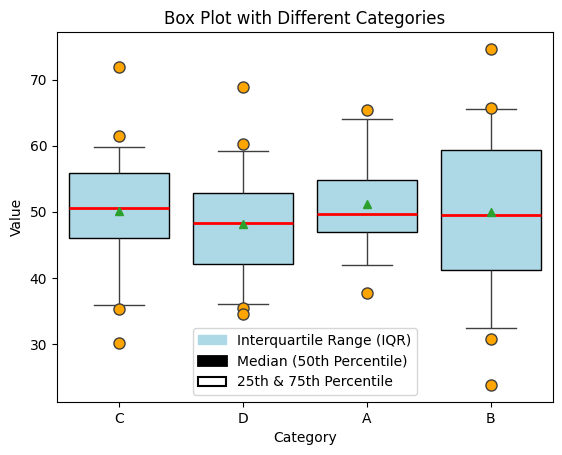

In [46]:
import matplotlib.patches as mpatches

# Sample DataFrame
np.random.seed(42)
data = {
    "Category": np.random.choice(["A", "B", "C", "D"], 100),
    "Value": np.random.randn(100) * 10 + 50  # Normally distributed data
}
df = pd.DataFrame(data)

sns.boxplot(x="Category", y="Value", data=df,
            boxprops={"facecolor": "lightblue", "edgecolor": "black"},
            medianprops={"color": "red", "linewidth": 2},
            flierprops={"marker": "o", "markerfacecolor": "orange", "markersize": 8},
            showfliers=True,
            showmeans=True,
            whis=[5,95])

plt.title("Box Plot with Different Categories")
plt.xlabel("Category")
plt.ylabel("Value")

# Create custom legend handles
handles = [
    mpatches.Patch(color="lightblue", label="Interquartile Range (IQR)"),  # Box color
    mpatches.Patch(facecolor="black", edgecolor="black", linewidth=2, label="Median (50th Percentile)"),  # Median line
    mpatches.Patch(edgecolor="black", facecolor="none", linewidth=1.5, label="25th & 75th Percentile")  # Box edges
]

# Add legend
plt.legend(handles=handles, loc="best")

plt.show()

Text(0, 0.5, 'Frequency')

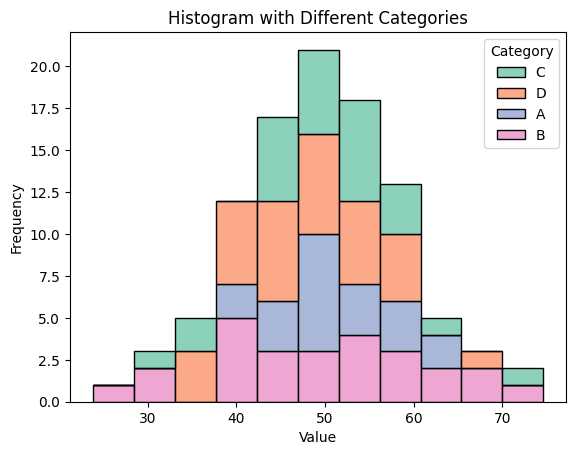

In [47]:
# Sample DataFrame
np.random.seed(42)
data = {
    "Category": np.random.choice(["A", "B", "C", "D"], 100),
    "Value": np.random.randn(100) * 10 + 50  # Normally distributed data
}
df = pd.DataFrame(data)

#sns.stripplot(x="Category", y="Value", data=df,jitter=True,palette="Set2",hue="Category")
#plt.title("Strip Plot with Different Categories")
#plt.xlabel("Category")
#plt.ylabel("Value")
#plt.show()

sns.histplot(data=df, x="Value", hue="Category", multiple="stack",palette="Set2")
plt.title("Histogram with Different Categories")
plt.xlabel("Value")
plt.ylabel("Frequency")


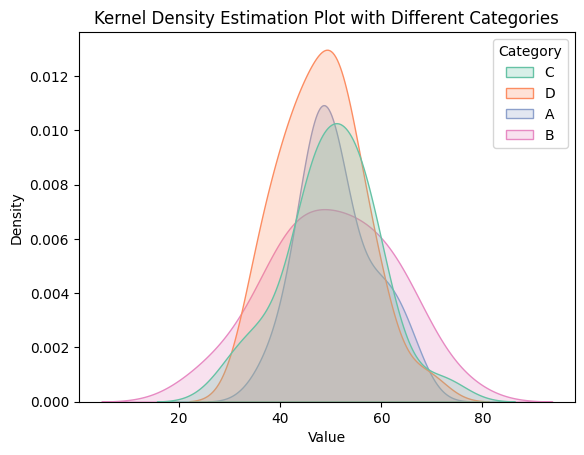

In [48]:
# Sample DataFrame
np.random.seed(42)
data = {
    "Category": np.random.choice(["A", "B", "C", "D"], 100),
    "Value": np.random.randn(100) * 10 + 50  # Normally distributed data
}
df = pd.DataFrame(data)

sns.kdeplot(data=df, x="Value", hue="Category", fill=True, palette="Set2")
plt.title("Kernel Density Estimation Plot with Different Categories")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()



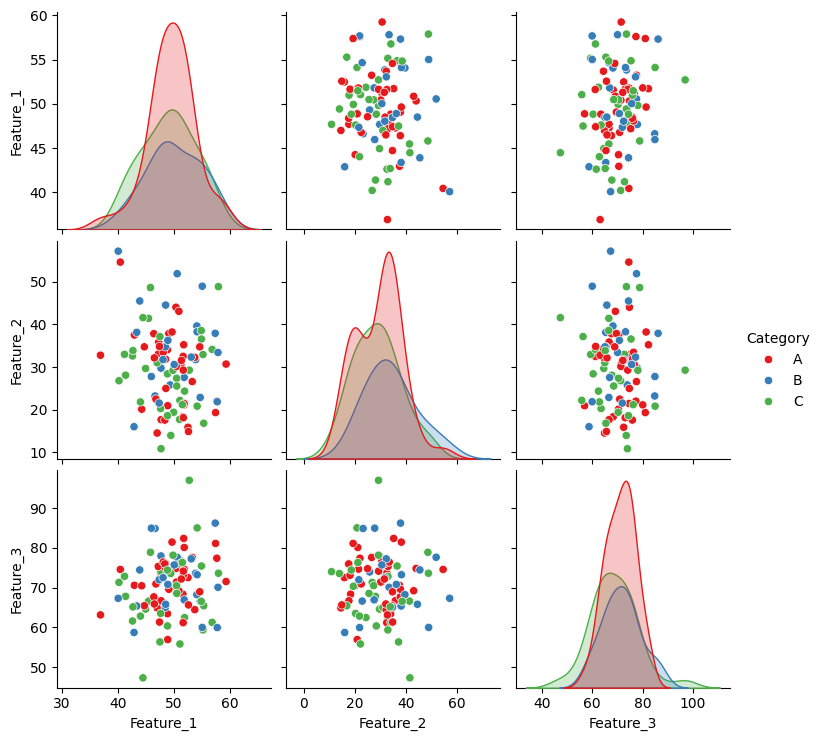

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Generate Sample Data
np.random.seed(42)
data = {
    "Feature_1": np.random.randn(100) * 5 + 50,  # Normally distributed data
    "Feature_2": np.random.randn(100) * 10 + 30,
    "Feature_3": np.random.randn(100) * 7 + 70,
    "Category": np.random.choice(["A", "B", "C"], 100)  # Categorical variable
}

df = pd.DataFrame(data)

# Create Pairplot
sns.pairplot(df, hue="Category", palette="Set1", diag_kind="kde")

# Show the plot
plt.show()